In [6]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [7]:
import numpy as np
import pandas as pd

In [8]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [10]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [11]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [12]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [13]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [ ]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [121]:
# Design a query to retrieve the last 12 months of precipitation data 
#and plot the results

# Calculate the date 1 year ago from the last data point in the database
   
results = session.query(Measurement).\
    filter(Measurement.date > '2016-08-22').\
    order_by(Measurement.date.desc()).all()

for result in results:
    print(f"Station: {result.station}, Date: {result.date}, Percipitation: {result.prcp}, TOBS: {result.tobs}")



Station: USC00519397, Date: 2017-08-23, Percipitation: 0.0, TOBS: 81.0
Station: USC00514830, Date: 2017-08-23, Percipitation: 0.0, TOBS: 82.0
Station: USC00519523, Date: 2017-08-23, Percipitation: 0.08, TOBS: 82.0
Station: USC00516128, Date: 2017-08-23, Percipitation: 0.45, TOBS: 76.0
Station: USC00519397, Date: 2017-08-22, Percipitation: 0.0, TOBS: 82.0
Station: USC00519523, Date: 2017-08-22, Percipitation: 0.0, TOBS: 82.0
Station: USC00516128, Date: 2017-08-22, Percipitation: 0.5, TOBS: 76.0
Station: USC00519397, Date: 2017-08-21, Percipitation: 0.0, TOBS: 81.0
Station: USC00514830, Date: 2017-08-21, Percipitation: 0.02, TOBS: 79.0
Station: USC00519523, Date: 2017-08-21, Percipitation: None, TOBS: 82.0
Station: USC00516128, Date: 2017-08-21, Percipitation: 0.56, TOBS: 76.0
Station: USC00519397, Date: 2017-08-20, Percipitation: 0.0, TOBS: 81.0
Station: USC00514830, Date: 2017-08-20, Percipitation: 0.01, TOBS: 80.0
Station: USC00516128, Date: 2017-08-20, Percipitation: None, TOBS: 78.0

Station: USC00517948, Date: 2016-09-12, Percipitation: None, TOBS: 79.0
Station: USC00519523, Date: 2016-09-12, Percipitation: 0.15, TOBS: 78.0
Station: USC00519281, Date: 2016-09-12, Percipitation: 0.31, TOBS: 76.0
Station: USC00516128, Date: 2016-09-12, Percipitation: 1.04, TOBS: 72.0
Station: USC00519397, Date: 2016-09-11, Percipitation: 0.05, TOBS: 76.0
Station: USC00513117, Date: 2016-09-11, Percipitation: 0.18, TOBS: 76.0
Station: USC00519523, Date: 2016-09-11, Percipitation: 0.12, TOBS: 83.0
Station: USC00519281, Date: 2016-09-11, Percipitation: 0.3, TOBS: 80.0
Station: USC00516128, Date: 2016-09-11, Percipitation: 0.6, TOBS: 71.0
Station: USC00519397, Date: 2016-09-10, Percipitation: 0.0, TOBS: 78.0
Station: USC00513117, Date: 2016-09-10, Percipitation: 0.01, TOBS: 76.0
Station: USC00519523, Date: 2016-09-10, Percipitation: 0.14, TOBS: 78.0
Station: USC00519281, Date: 2016-09-10, Percipitation: 0.09, TOBS: 77.0
Station: USC00516128, Date: 2016-09-10, Percipitation: 1.16, TOBS: 

In [115]:
# Perform a query to retrieve the data and precipitation scores

prcp_results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date.desc()).all()


In [116]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_results)

# Sort the dataframe by date
prcp_df.set_index('date', inplace=True)
prcp_df.head()


,prcp
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00


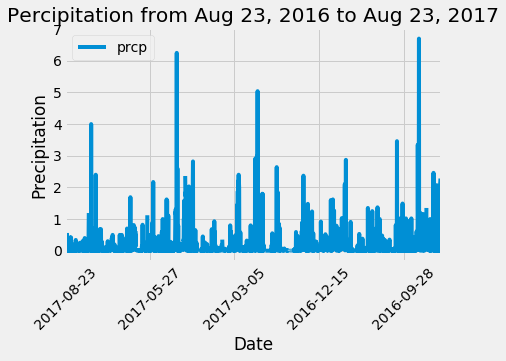

In [125]:
# Use Pandas Plotting with Matplotlib to plot the data
#prcp_plot = prcp_df.plot(kind="bar", figsize=(20,5))
prcp_df.plot(rot=45)
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title("Percipitation from Aug 23, 2016 to Aug 23, 2017")
plt.show()
#plt.tight_layout() 



![precipitation](Images/precipitation.png)

In [126]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [129]:
# Design a query to show how many stations are available in this dataset?

station_count = session.query(Measurement).group_by(Measurement.station).count()
station_count

9

In [137]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.date))\
                    .group_by(Measurement.station).order_by(func.count(Measurement.date)\
                    .desc()).all()
station_activity


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [159]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

min_temp = session.query(func.min(Measurement.tobs)).filter_by(station='USC00519281').scalar()
max_temp = session.query(func.max(Measurement.tobs)).filter_by(station='USC00519281').scalar()
avg_temp = session.query(func.avg(Measurement.tobs)).filter_by(station='USC00519281').scalar()

print(f"Most Active Station Stats") 
print(f"----------------------------")
print(f"Station ID: USC00519281")
print(f"----------------------------")
print(f"Min Temp: {min_temp}")
print(f"Max Temp: {max_temp}")
print(f"Avg Temp: {avg_temp}")
print(f"----------------------------")

Most Active Station Stats
----------------------------
Station ID: USC00519281
----------------------------
Min Temp: 54.0
Max Temp: 85.0
Avg Temp: 71.66378066378067
----------------------------


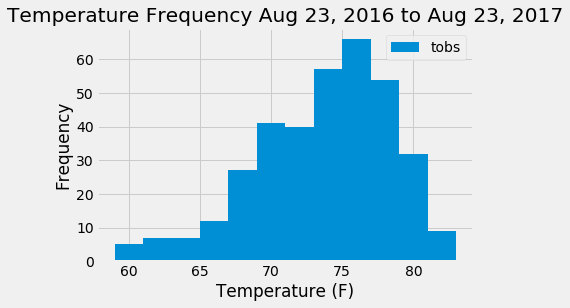

In [162]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
date = dt.date(2017,8,23)

station_max_obv = engine.execute("select max(date) from Measurement where station = 'USC00519281'")
station_date = dt.date(2017,8,23)
station_year = date-dt.timedelta(days=365)

station_data = engine.execute("select tobs, date from Measurement where date>='2016-08-18' and station= 'USC00519281'")

station_data_df = pd.DataFrame(station_data, columns=["tobs", "date"])

station_data_df.plot.hist(bins=12)
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.title("Temperature Frequency Aug 23, 2016 to Aug 23, 2017")
plt.show()


![precipitation](Images/station-histogram.png)

In [164]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [166]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

print(calc_temps('2017-06-04', '2017-06-10'))

[(72.0, 77.41304347826087, 81.0)]


/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


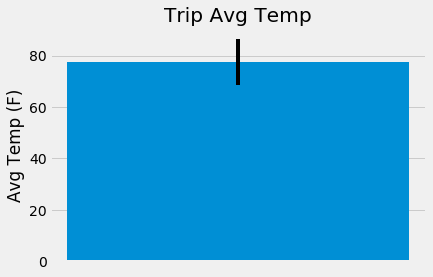

<Figure size 432x288 with 0 Axes>

In [170]:
# Plot the results from your previous query as a bar chart. 
temps = calc_temps('2017-06-04', '2017-06-10')
temps_df = pd.DataFrame(temps, columns=['temp min', 'temp avg', 'temp max'])

min_temp = temps_df.iloc[0][0]
avg_temp = temps_df.iloc[0][1]
max_temp = temps_df.iloc[0][2]

# Use the average temperature for the y value
yvalue = avg_temp

# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
yerr = max_temp - min_temp

# Use "Trip Avg Temp" as your Title

plt.bar(1,yvalue,yerr=yerr)

ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

plt.title("Trip Avg Temp")
plt.ylabel("Avg Temp (F)")
plt.show()

In [175]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

prcp_prev_year = session.query(Measurement.station, func.sum(Measurement.prcp))\
                .group_by(Measurement.station).filter(Measurement.date>='2016-06-04')\
                .filter(Measurement.date<='2016-06-10')

prcp_prev_year_df = pd.DataFrame(prcp_prev_year, columns=["station", "prcp sum"])

station_info = session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation)
station_info_df = pd.DataFrame(station_info)

station_prcp_df = pd.merge(station_info_df, prcp_prev_year_df, on ="station")
station_prcp_df = station_prcp_df.sort_values(by="prcp sum", ascending=False)
station_prcp_df


,station,name,latitude,longitude,elevation,prcp sum
6,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,4.84
5,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,2.00
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,1.66
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.78
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.25
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.07
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,NaN


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


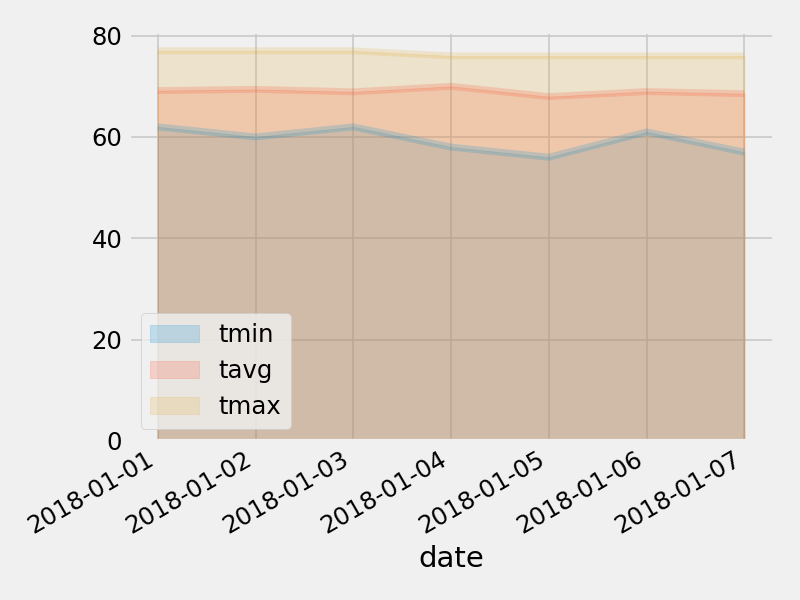

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
